#Posttest 2
##Nama  : Sahriah
##NIM   : 2109106087
##Kelas : C1'22

Lanjutkan codingan kalian sebelumnya dengan melakukan data preprocessing pada dataset yang kalian miliki, dengan ketentuan sebagai yaitu:


1. Data Cleaning
Handling missing value (jika ada)
Handling duplicate value (jika ada)
Handling outlier (jika ada)
2. Normalisasi/standarisasi kolom numerik
3. Encoding kolom kategorikal
4. Feature engineering (minimal 1 feature baru)
5. Splitting data ke dalam data training & data testing

📌NOTE: Berikan penjelasan menggunakan markdown dengan alasan yang jelas.

Format Penamaan:
NIM_NAMA_POSTTEST3.ipynb

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

heart = pd.read_csv('https://raw.githubusercontent.com/sahriahs/Praktikum_KB/refs/heads/master/Posttest_2_KB/heart_posttest2.csv')

In [2]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


##1. Data Cleaning Handling missing value (jika ada) Handling duplicate value (jika ada) Handling outlier (jika ada)

periksa missing Value Pada Dataset

In [3]:
heart.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


Periksa Nilai Duplikat Pada Dataset

In [4]:
heart.duplicated().sum()

0

Jumlah outlier berdasarkan Cholesterol: 183
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
28    53   F           ATA        113          468          0     Normal   
30    53   M           NAP        145          518          0     Normal   
69    44   M           ASY        150          412          0     Normal   
76    32   M           ASY        118          529          0     Normal   
103   40   M           ASY        120          466          1     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
535   56   M           ASY        130            0          0        LVH   
536   62   M           NAP        133            0          1         ST   
616   67   F           NAP        115          564          0        LVH   
667   65   F           NAP        140          417          1        LVH   
796   56   F           ASY        134          409          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope

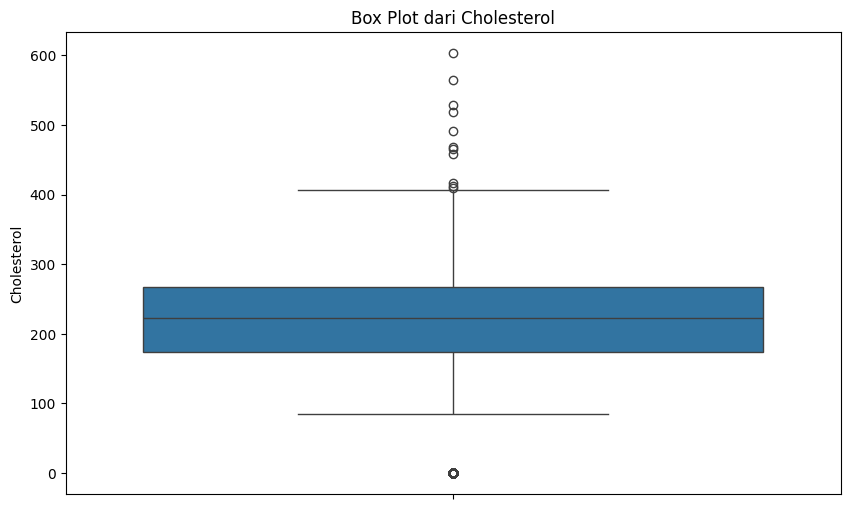

In [6]:
# Metode IQR untuk mendeteksi outlier
Q1 = heart['Cholesterol'].quantile(0.25)
Q3 = heart['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = heart[(heart['Cholesterol'] < lower_bound) | (heart['Cholesterol'] > upper_bound)]

print(f"Jumlah outlier berdasarkan Cholesterol: {len(outliers)}")
print(outliers)

# Membuat Box Plot untuk visualisasi outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=heart, y='Cholesterol')
plt.title('Box Plot dari Cholesterol')
plt.ylabel('Cholesterol')
plt.show()